# EDA och beskrivning av dataset

## EDA

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df_twitter = pd.read_csv("Data/Twitter_Data.csv")
df_twitter.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [80]:
df_twitter.info(), df_twitter.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


(None, Index(['clean_text', 'category'], dtype='object'))

In [81]:
df_test_tweets = df_twitter[df_twitter["category"].isna()].reset_index(drop = True) ## If it goes beyond the EDA phase. Can be used as test data.

In [101]:
df_test_tweets

,clean_text,category
0,the foundation stone northeast gas grid inaugu...,NaN
1,dear terrorists you can run but you cant hide ...,NaN
2,offense the best defence with mission shakti m...,NaN
3,have always heard politicians backing out thei...,NaN
4,modi government plans felicitate the faceless ...,NaN
5,chidambaram gives praises modinomics,NaN
6,the reason why modi contested from seats 2014 ...,NaN


In [82]:
df_twitter = df_twitter.dropna().reset_index(drop= True) ## Removes rows with Null values

In [83]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162969 entries, 0 to 162968
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [84]:
df_twitter.describe()

,category
count,162969.000000
mean,0.225442
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


 1.0    72249
 0.0    55211
-1.0    35509
Name: category, dtype: int64


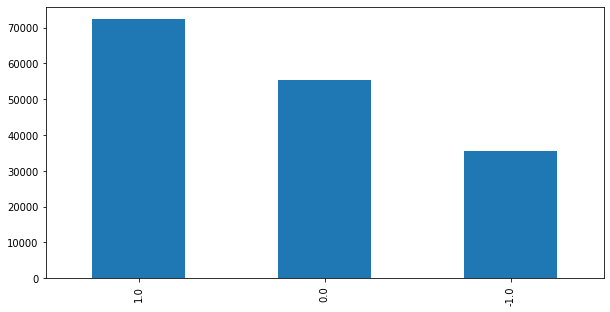

In [93]:
## Plots the values counts of the three different labels
plt.figure(figsize = (10,5))
df_twitter["category"].value_counts().plot(kind = "bar")
print(df_twitter["category"].value_counts())

In [91]:
## Prints 5 negative classified tweets
five_neg_reviews = df_twitter[df_twitter["category"].isin([-1])].head(5)

neg_text_samples = five_neg_reviews["clean_text"]

for i, item in enumerate(neg_text_samples):
    print(f"{i}: {item}")

0: when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
1: vote such party and leadershipwho can take fast and firm action none other than narendra damodardas modi and bjp party 
2: didn’ write chowkidar does mean ’ anti modi try visit the plz not all who haven’ used are anti 
3: with firm belief the leadership shri narendra modi bjp entering into politics given form file nomination for the khammam parliamentary seat proceeding khammam today 
4: sultanpur uttar pradesh loksabha candidate select pawan kumar pandey actually public want given vote modi but your current condidate not popular district your candidate bsp candidate sonbhadra singh


In [87]:
## Prints 5 neutral classified tweets
five_neut_reviews = df_twitter[df_twitter["category"].isin([0])].head(5)

neut_text_samples = five_neut_reviews["clean_text"]

for i, item in enumerate(neut_text_samples):
    print(f"{i}: {item}")

0: talk all the nonsense and continue all the drama will vote for modi 
1: kiya tho refresh maarkefir comment karo 
2: surat women perform yagna seeks divine grace for narendra modi become again

3: this comes from cabinet which has scholars like modi smriti and hema time introspect
4: one vote can make all the difference anil kapoor answers modis election 2019 clarion call extends support his vote kar campaign 


In [88]:
## Prints 5 positiv classified tweets
five_pos_reviews = df_twitter[df_twitter["category"].isin([1])].head(5)

pos_text_samples = five_pos_reviews["clean_text"]

for i, item in enumerate(pos_text_samples):
    print(f"{i}: {item}")

0: what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax
1: asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars
2: answer who among these the most powerful world leader today trump putin modi may 
3: with upcoming election india saga going important pair look current modi leads govt elected with deal brexit combination this weekly looks juicy bears imho 
4: gandhi was gay does modi  


## Dataset

Datasetet består av två kolumner. En kolumn är fört tweetsen. Den andra kolumnen är för den markering som tweeten har fått vilket vär antingen positiv, neutral eller negativ. 